# Aprendizado de Máquina - Classificação
Caderno de Desenvolvimento <br>
Curadoria de [Rafael Barbosa](https://www.linkedin.com/in/barbosa89/)

---

Previsão da espécie de pinguins 'species' (variável resposta) treinando um modelo com dados de características físicas e geográficas (variáveis preditivas).

In [ ]:
# Livrarias utilizadas 
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

## 1\. Dados
sns.load_dataset('penguins')

In [ ]:
# Carrega o banco de dados 'penguins' da  livraria seaborn 
df = sns.load_dataset('penguins')
df.info()
print("\n")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Colunas de dados:

species,	island,	bill_length_mm,	bill_depth_mm,	flipper_length_mm,	body_mass_g	sex

### **1.1. Analise exploratoria**

Os gráficos abaixo ajudam a entender a relação entre os atributos e variável resposta da base de dados.

 - Atributos por sexo:

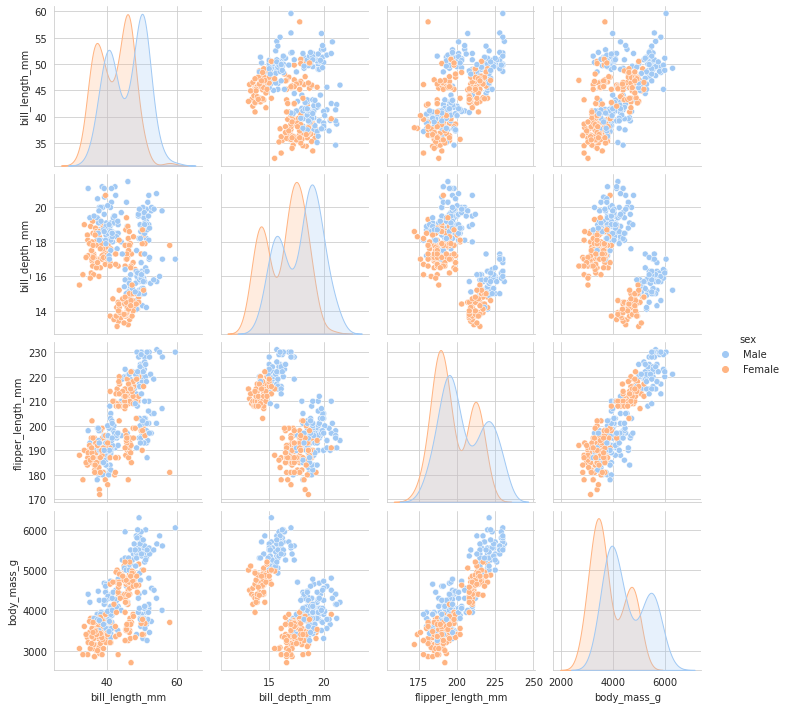

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, hue="sex", palette="pastel")

Aparente polarização do sexo observando as dimenções. Femenino apresenta dimensões menores comparadas ao Masculino.

 - Atributos por espécie:

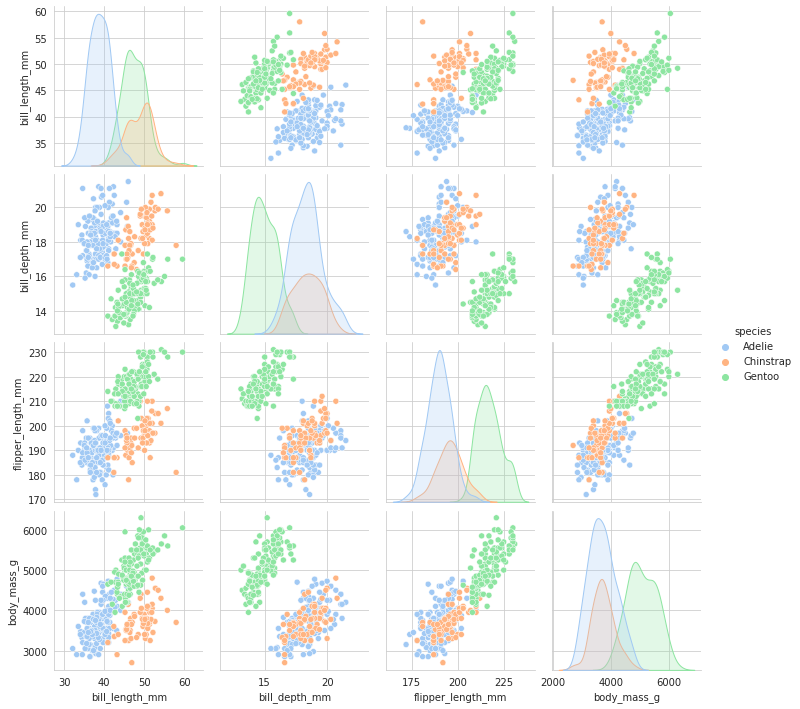

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, hue="species", palette="pastel")

As espécie apresentam agrupamentos de acorco com as dimenções. Pinguins Adelie tendem a apresentar dimensões menores comparadas à indivíduos das demais espécies.

 - Atributos por ilha:

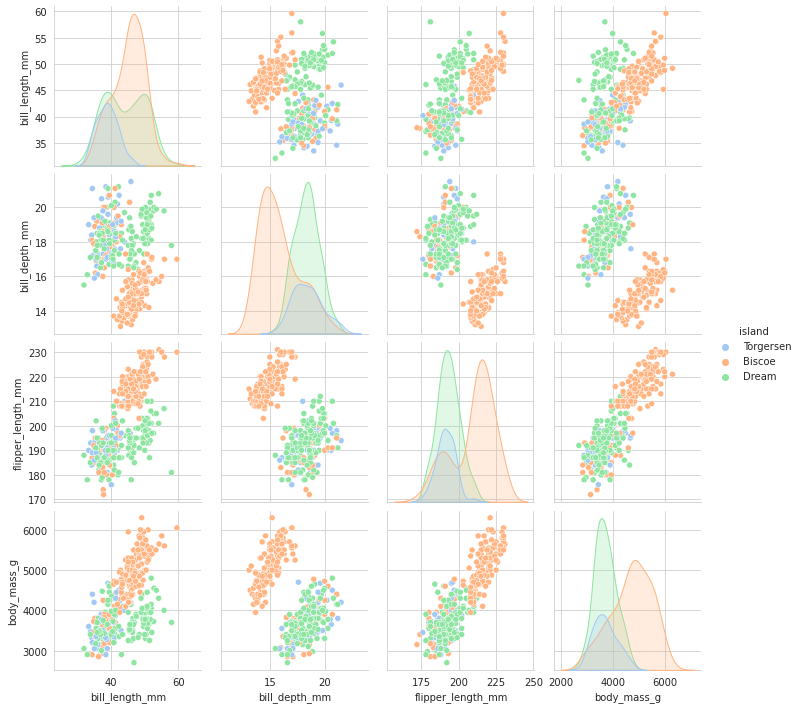

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, hue="island", palette="pastel")

Agrupamento de características de acordo com a ilha. Pinguins de Biscoe tendem a apresentar dimensões mais específicas comparadas à indivíduos das demais ilhas.

 - Atributos numéricos por espécie:

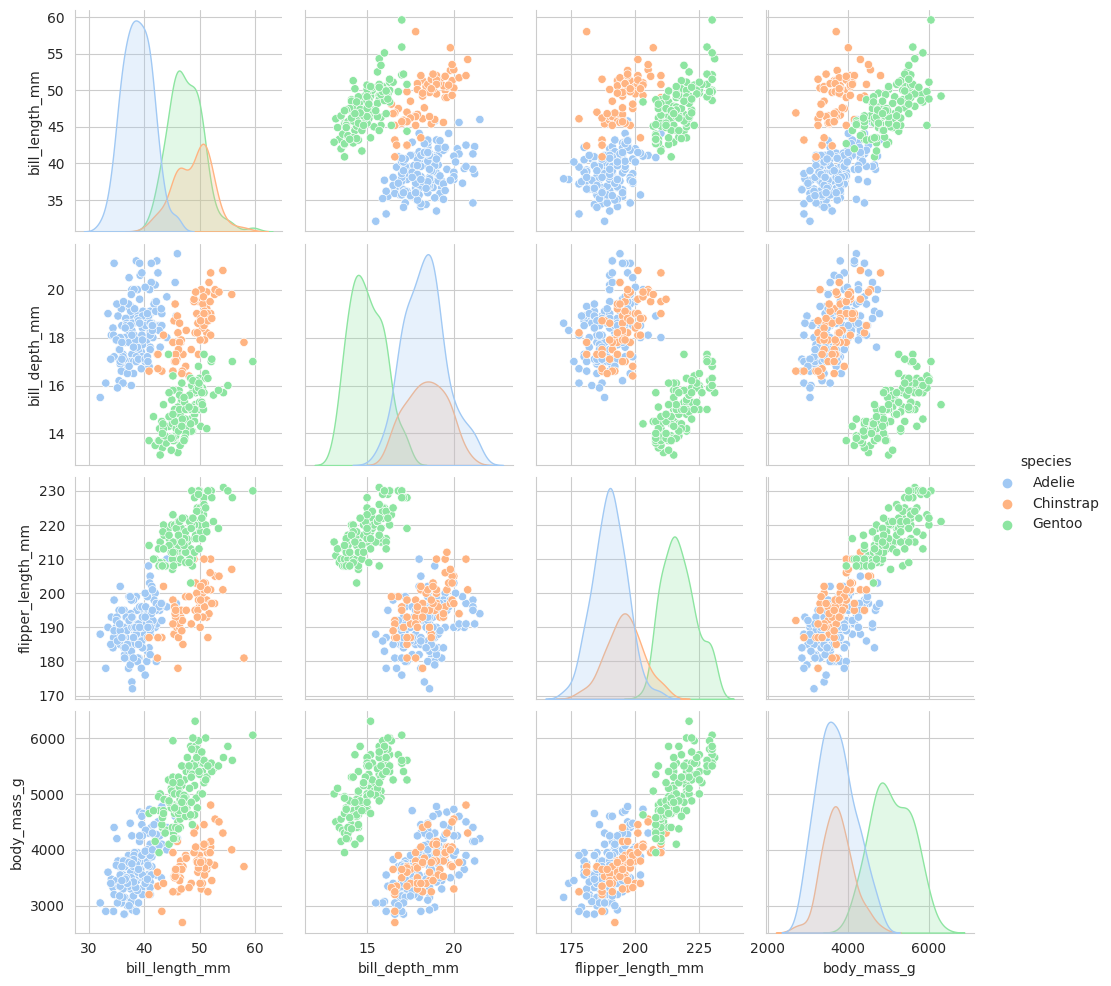

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** O comprimento do bico é a característica que melhor defirencia as espécies. Gentoo se destaca das demais por apresentar padrões de dispersão agrupados, sendo mais evidente maiores dimensões de nadadeiras e peso, e bico mais achatado. As espécies Adelie e Chinstrap apresentam características similares e diferenciam-se mais claramente pelo comprimento do bico, onde Adelie apresentam menor comprimento em relação às demais espécies.

 - Sexo por espécie:

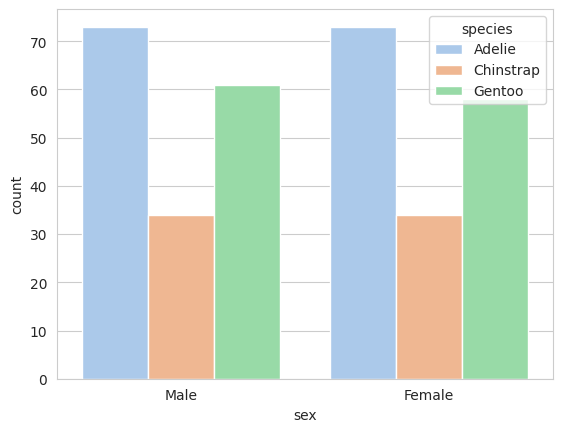

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=df, x='sex', hue="species", palette="pastel")

**Comentário:** Os dados apresentam espécies que estão igualmente divididas por sexo e com maior número de dados para Adelie, seguido por Gentoo e Chinstrap por último com menos da metade da contagem de registros para Adelie. Isso pode reduzir a precisão dos modelos de predição uma vez que as espécies estão sendo avaliadas de forma desbalanceada.

 - Ilha por espécie:

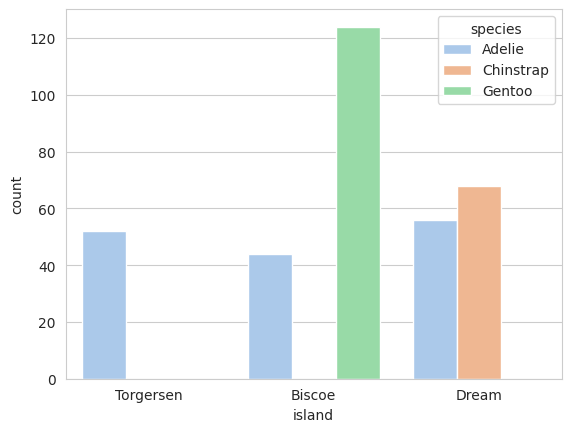

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=df, x='island', hue="species", palette="pastel")

**Comentário:** Enquanto existem observações de Adelie nas três ilhas consideradas neste conjunto de dados, a espécie Gentoo foi observada apenas na ilha Biscoe e a espécie Chinstrap foi observada apenas na ilha Dream.

## 2\. Data Wrangling
Preparar o dataframe

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [ ]:

# Carregar o conjunto de dados
df = sns.load_dataset('penguins')
df.info()
print("\n")

# 1 - descarta dados faltantes e nulos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_leng

### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [ ]:
# resposta da questão 2.2

# 2 - Variáveis categóricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('species')  # Remover a variável resposta

for col in categorical_cols:
    dummies = pd.get_dummies(df[col], prefix=col)
    dummies.columns = [name + '_nom' for name in dummies.columns]  # Adicionar sufixo '_nom'
    df = pd.concat([df, dummies], axis=1)

df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sex_Female_nom,sex_Male_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,0,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0,1,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,1,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0,1,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,0,1,0,1


### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [ ]:
# resposta da questão 2.3

# 3 - Limpeza
df = df[['species', 'bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g'	] + [col for col in df.columns if col.endswith('_nom') or col.endswith('_ord')]]

df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sex_Female_nom,sex_Male_nom
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               333 non-null    object 
 1   bill_length_mm        333 non-null    float64
 2   bill_depth_mm         333 non-null    float64
 3   flipper_length_mm     333 non-null    float64
 4   body_mass_g           333 non-null    float64
 5   island_Biscoe_nom     333 non-null    uint8  
 6   island_Dream_nom      333 non-null    uint8  
 7   island_Torgersen_nom  333 non-null    uint8  
 8   sex_Female_nom        333 non-null    uint8  
 9   sex_Male_nom          333 non-null    uint8  
dtypes: float64(4), object(1), uint8(5)
memory usage: 17.2+ KB


### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [ ]:
# resposta da questão 2.4

from sklearn.model_selection import train_test_split

# Definir a variável resposta e as variáveis preditivas
X = df.drop('species', axis=1)
y = df['species']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=123)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 267 to 331
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bill_length_mm        222 non-null    float64
 1   bill_depth_mm         222 non-null    float64
 2   flipper_length_mm     222 non-null    float64
 3   body_mass_g           222 non-null    float64
 4   island_Biscoe_nom     222 non-null    uint8  
 5   island_Dream_nom      222 non-null    uint8  
 6   island_Torgersen_nom  222 non-null    uint8  
 7   sex_Female_nom        222 non-null    uint8  
 8   sex_Male_nom          222 non-null    uint8  
dtypes: float64(4), uint8(5)
memory usage: 9.8 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 111 to 84
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bill_length_mm        111 non-null    float64
 1   bill_depth_mm         111 non-null    float64
 2   flipper_length_mm     111 non-null    float64
 3   body_mass_g           111 non-null    float64
 4   island_Biscoe_nom     111 non-null    uint8  
 5   island_Dream_nom      111 non-null    uint8  
 6   island_Torgersen_nom  111 non-null    uint8  
 7   sex_Female_nom        111 non-null    uint8  
 8   sex_Male_nom          111 non-null    uint8  
dtypes: float64(4), uint8(5)
memory usage: 4.9 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 222 entries, 267 to 331
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
222 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 111 entries, 111 to 84
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
111 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** a árvore de decisão apresenta 8 folhas, que são os últimos nós, de finalização.

In [ ]:
# resposta da questão 3.1
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'island_Biscoe_nom', 'island_Dream_nom',
        'island_Torgersen_nom', 'sex_Female_nom', 'sex_Male_nom'],
       dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x7e1b2251b1a0>}

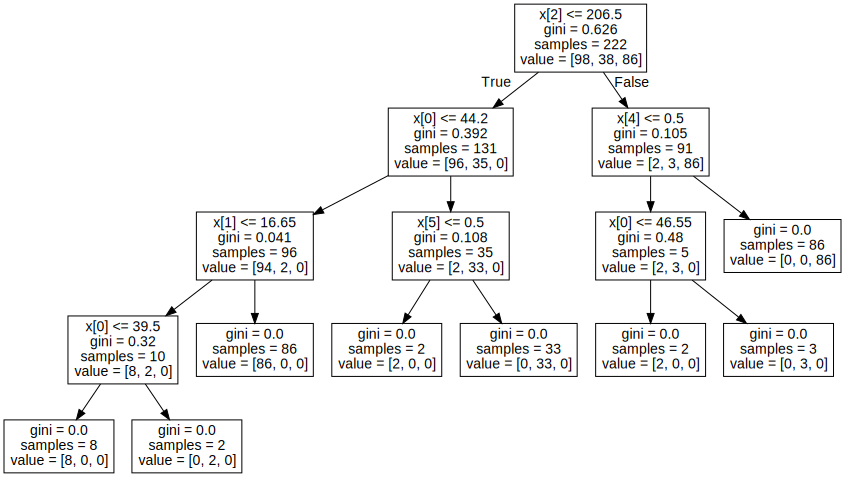

In [ ]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [ ]:
df.head(1)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sex_Female_nom,sex_Male_nom
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1


In [ ]:
features = np.array([39.1, 18.7, 181.0, 3750.0, 0, 0, 1, 0, 1])
prediction = model.predict(features.reshape(1, -1))

print(prediction)

['Adelie']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** O modelo resultou em acerto para todas as previões da espécie Adelie, errou em 5 ocasiões onde a espécie era Chinstrap e foi classificada como Adelie, e 1 erro para Gentoo onde também foi classifcada como Adelie.

In [ ]:
# resposta da questão 3.2.a
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prever os valores de 'species' para os dados de teste
y_predicted = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

[[48  0  0]
 [ 4 26  0]
 [ 1  0 32]]


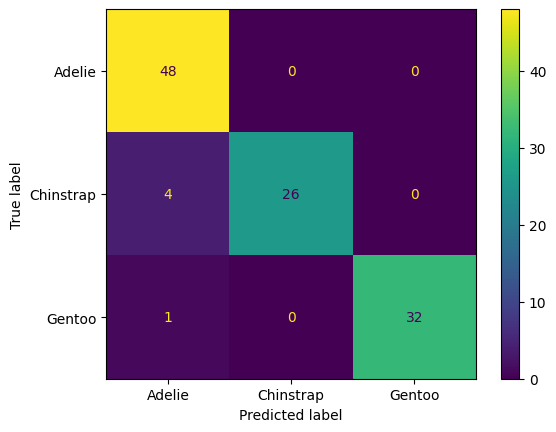

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [ ]:
# resposta da questão 3.2.b
from sklearn.metrics import accuracy_score

total = confusion_matrix.sum()
print(f'total = {total}')
acertos = np.diag(confusion_matrix).sum()
print(f'acertos = {acertos}')

acuracia = accuracy_score(y_test, y_predicted)
print(f"acurácia para o modelo de árvore de decisão foi de {round(100 * acuracia, 2)}%")

total = 111
acertos = 106
acurácia para o modelo de árvore de decisão foi de 95.5%


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [ ]:
# resposta da questão 4.1
# Criar um DataFrame com as características dadas
penguin = pd.DataFrame({
    'island': ['Biscoe'],
    'bill_length_mm': [38.2],
    'bill_depth_mm': [18.1],
    'flipper_length_mm': [185.0],
    'body_mass_g':[3950.0],
    'sex': ['Male']
})

# data = np.array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        # 'body_mass_g',
        # 'island_Biscoe_nom', 'island_Dream_nom','island_Torgersen_nom',
        # 'sex_Female_nom', 'sex_Male_nom'])

penguin = np.array([penguin['bill_length_mm'], penguin['bill_depth_mm'], penguin['flipper_length_mm'], penguin['body_mass_g'],1,0,0,0,1])

especie = model.predict(penguin.reshape(1, -1))

print('Classe de espécie predita:', especie,'\n')

Classe de espécie predita: ['Adelie'] 



<ipython-input-23-33e85edf4af7>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  penguin = np.array([penguin['bill_length_mm'], penguin['bill_depth_mm'], penguin['flipper_length_mm'], penguin['body_mass_g'],1,0,0,0,1])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
model.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

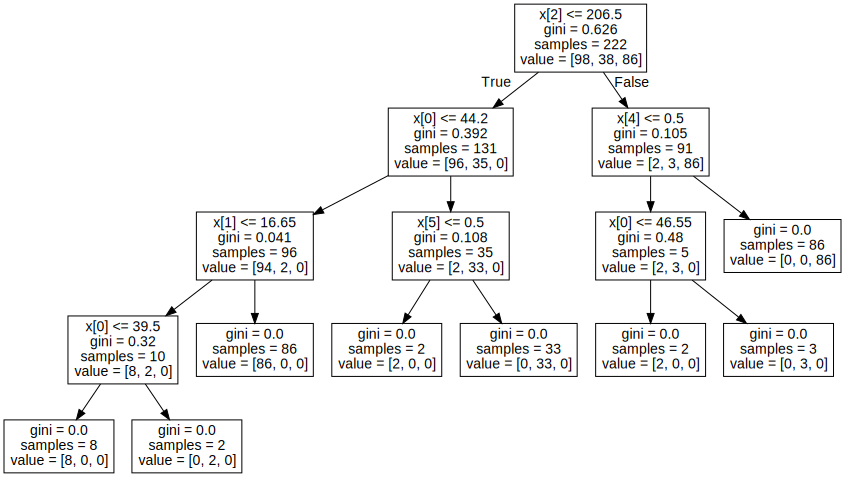

In [ ]:
graph

---